# SMAP Sea Surface Salinity and IMERG Precipitation Tutorial
#### *Author: Julie Sanchez, NASA PO.DAAC*

## Summary:

This tutorial uses the Earthdata Search ([https://search.earthdata.nasa.gov/](https://search.earthdata.nasa.gov/)) to download the data on your local machine. You will need to create an account in order to download the data.

## Datasets:

1. **JPL SMAP L3 Dataset:** [https://podaac.jpl.nasa.gov/dataset/SMAP_JPL_L3_SSS_CAP_8DAY-RUNNINGMEAN_V5?ids=&values=&search=Smap Level 3&provider=POCLOUD](https://podaac.jpl.nasa.gov/dataset/SMAP_JPL_L3_SSS_CAP_8DAY-RUNNINGMEAN_V5?ids=&values=&search=Smap%20Level%203&provider=POCLOUD)
    
2. **GPM IMERG Late Precipitation:** [https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDL_06/summary?keywords=gpm imerg](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDL_06/summary?keywords=gpm%20imerg)

## Learning Objectives:

Uses python to plot the SMAP sea surface salinity anomalies over the ocean and the IMERG precipitation over the land.

## Import needed packages

In [2]:
import glob
import numpy as np
import xarray as xr
import hvplot.xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import os

/opt/anaconda3/envs/plotting/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load directories

In [3]:
#Replace with your directory 
base_directory = "/Users/username" 

#Replace with your directory. This will be the output for plots
outputpath = (os.path.join(base_directory, 'Desktop/plots/'))


## Open subset_location the SMAP SSS data for a specified subset

In [4]:
#the subset used to determine which values are plotted
subset_bounds = ['20221226', '20230116'] 

#calculates the mean over the same time period as the plotted values
subset_mean_bounds = subset_bounds 

#Replace with your directory of SMAP files
allsubset_files = xr.open_mfdataset(os.path.join(base_directory, 'Desktop/JPL_SMAP_L3/SMAP*.nc*'))


#grabs smap data from 12-26-2015 to 01-16-2023
allsubset_files = allsubset_files.sel(time=(allsubset_files['time'].dt.strftime('%m%d') >= subset_mean_bounds[0][4:8]) | (allsubset_files['time'].dt.strftime('%m%d') <= subset_mean_bounds[1][4:8]))
allsubset_files['time'].values


array(['2015-12-26T12:00:00.000000000', '2015-12-27T12:00:00.000000000',
       '2015-12-28T12:00:00.000000000', '2015-12-29T12:00:00.000000000',
       '2015-12-30T12:00:00.000000000', '2015-12-31T12:00:00.000000000',
       '2016-01-01T12:00:00.000000000', '2016-01-02T12:00:00.000000000',
       '2016-01-03T12:00:00.000000000', '2016-01-04T12:00:00.000000000',
       '2016-01-05T12:00:00.000000000', '2016-01-06T12:00:00.000000000',
       '2016-01-07T12:00:00.000000000', '2016-01-08T12:00:00.000000000',
       '2016-01-09T12:00:00.000000000', '2016-01-10T12:00:00.000000000',
       '2016-01-11T12:00:00.000000000', '2016-01-12T12:00:00.000000000',
       '2016-01-13T12:00:00.000000000', '2016-01-14T12:00:00.000000000',
       '2016-01-15T12:00:00.000000000', '2016-01-16T12:00:00.000000000',
       '2016-12-26T12:00:00.000000000', '2016-12-27T12:00:00.000000000',
       '2016-12-28T12:00:00.000000000', '2016-12-29T12:00:00.000000000',
       '2016-12-30T12:00:00.000000000', '2016-12-31

## Calculates the mean

/var/folders/f0/dgnqgvtx46513by9cdh6fnjw0000gq/T/ipykernel_66947/1610522150.py:5: RuntimeWarning: Mean of empty slice
  subset_mean_values = np.nanmean(subset_location['smap_sss'], axis=0)


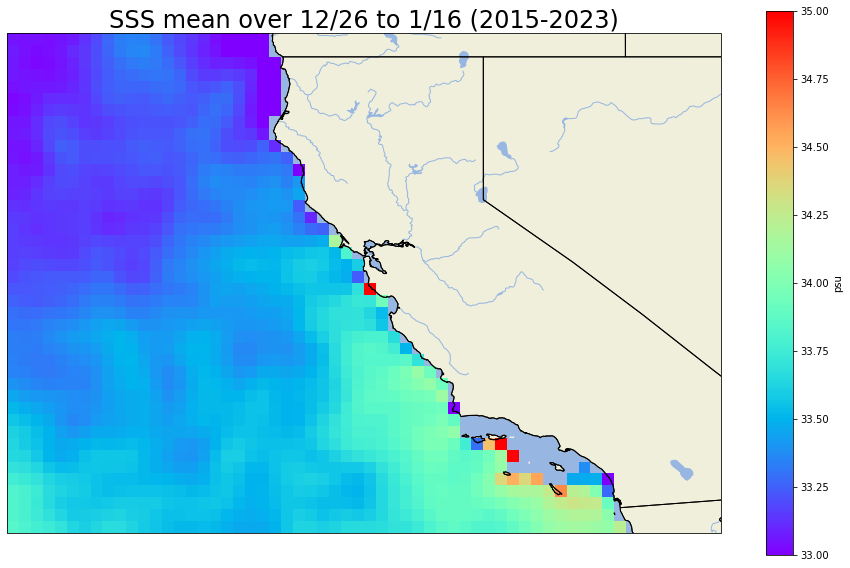

In [5]:
#subsets to the location of the pacific coast and California 
subset_location = allsubset_files.where((allsubset_files.latitude>20)&(allsubset_files.latitude<50)&(allsubset_files.longitude>-140)&(allsubset_files.longitude<-100), drop=True)

#calculates the mean for the 'smap_sss' variable
subset_mean_values = np.nanmean(subset_location['smap_sss'], axis=0)

#gets rid of past mean value if you were to run this code again with different dates
if 'backup_subset_mean_values' in globals():
    del backup_subset_mean_values
    
#plots the figure and saves it to your output path
fig = plt.figure(figsize= (16,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
s = plt.pcolormesh(subset_location.longitude, subset_location.latitude, subset_mean_values, vmin =  33, vmax= 35, cmap = 'rainbow', transform = ccrs.PlateCarree())
cb = plt.colorbar(s)
cb.set_label('psu')
ax.set_title(f'SSS mean over 12/26 to 1/16 (2015-2023)', size = 24)
ax.grid()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.coastlines()
ax.set_xlim(-130, -115)
ax.set_ylim(32, 42.5)

#saves figure to output path 
plt.savefig(outputpath+datetime.now().strftime("%Y%m%d-%H%M%S")+'.png',dpi=400, facecolor='w', transparent=False, bbox_inches='tight')

## plot the anomalies for subset bounds

/var/folders/f0/dgnqgvtx46513by9cdh6fnjw0000gq/T/ipykernel_66947/576375500.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize= (16,10))


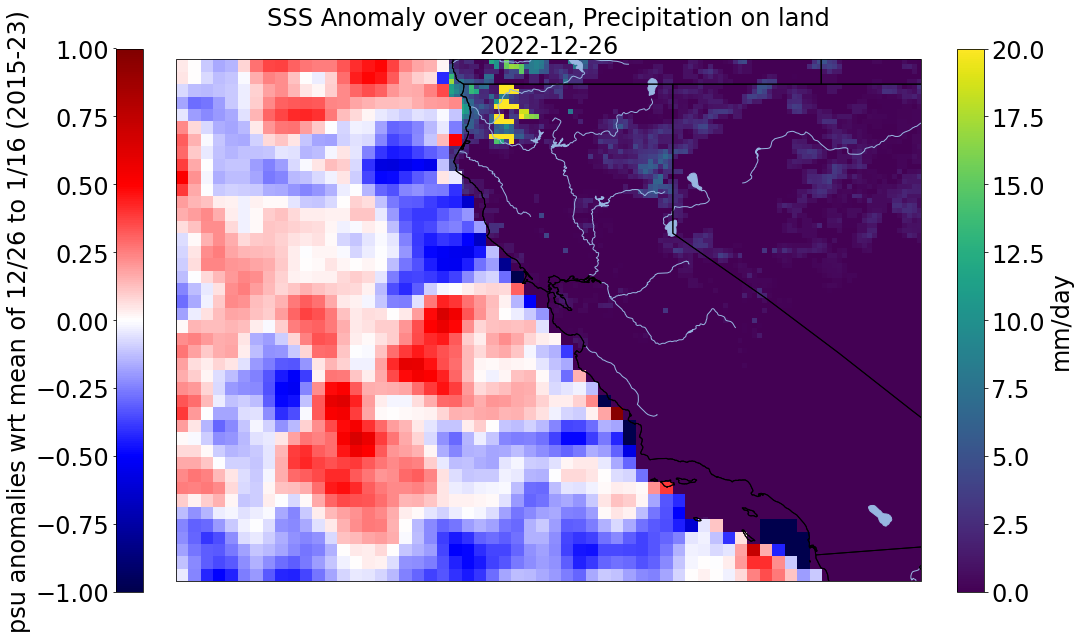

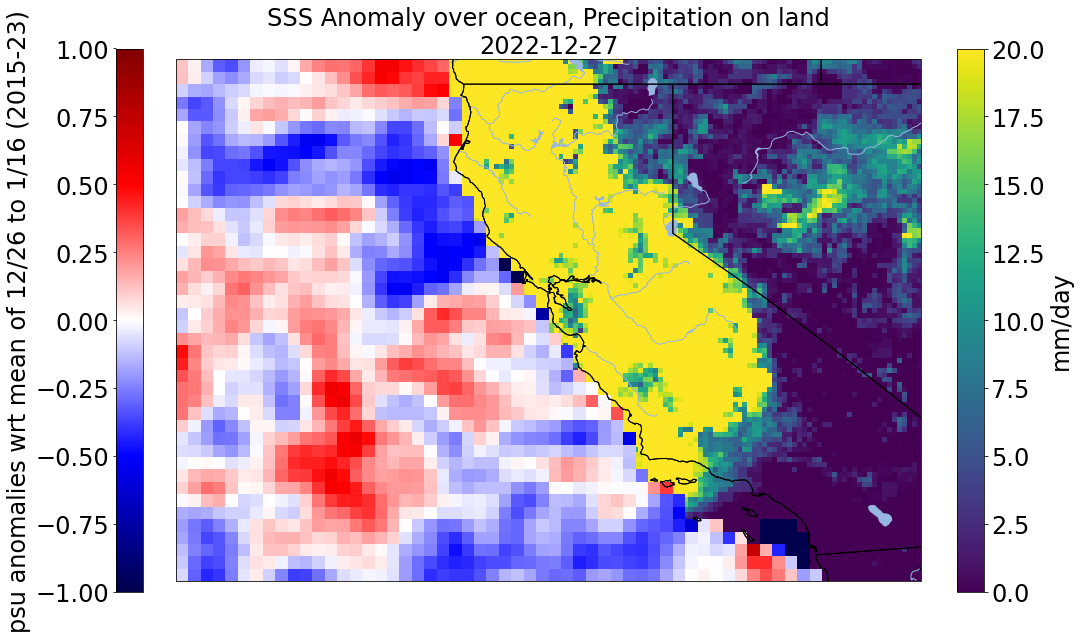

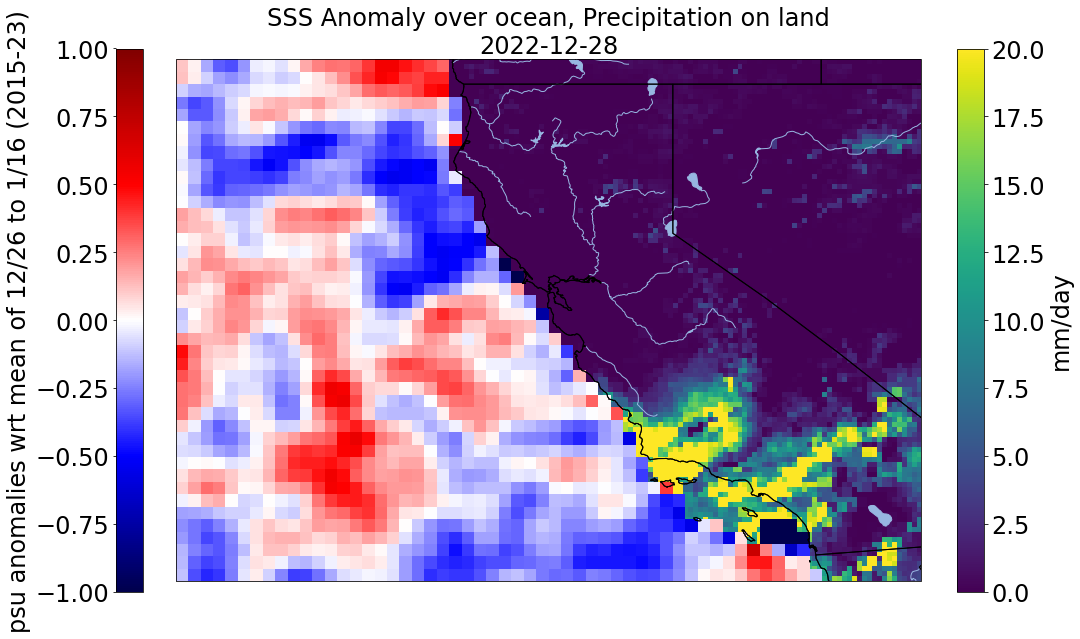

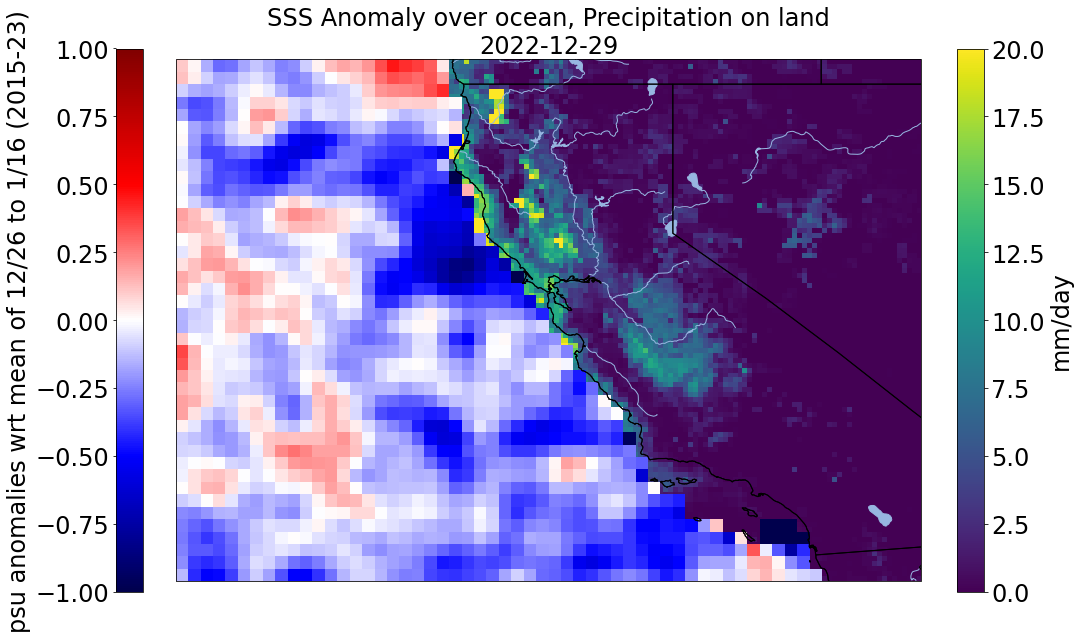

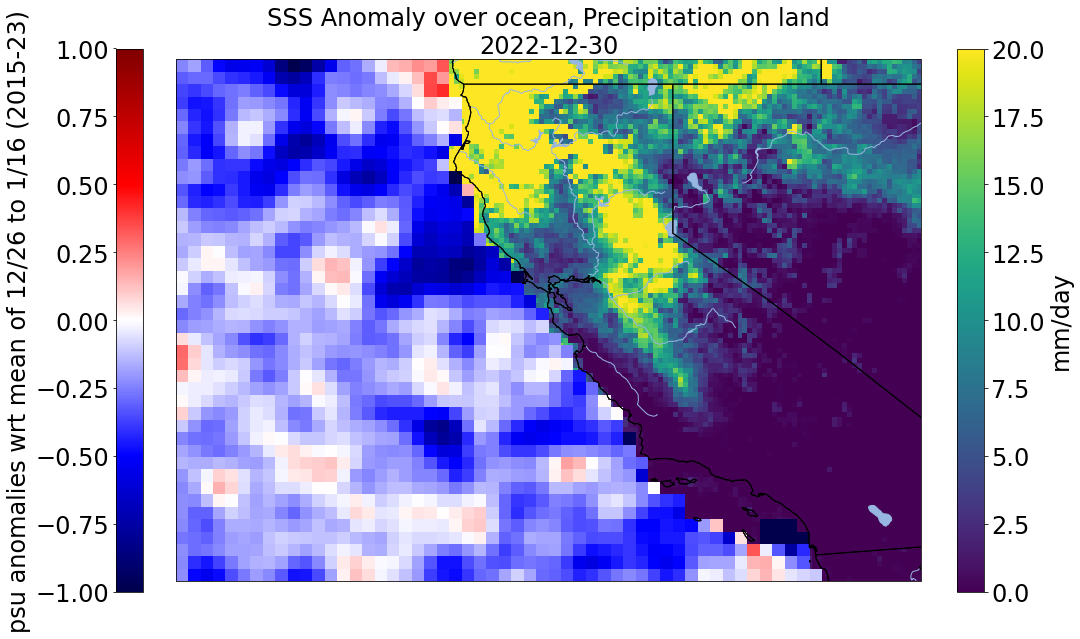

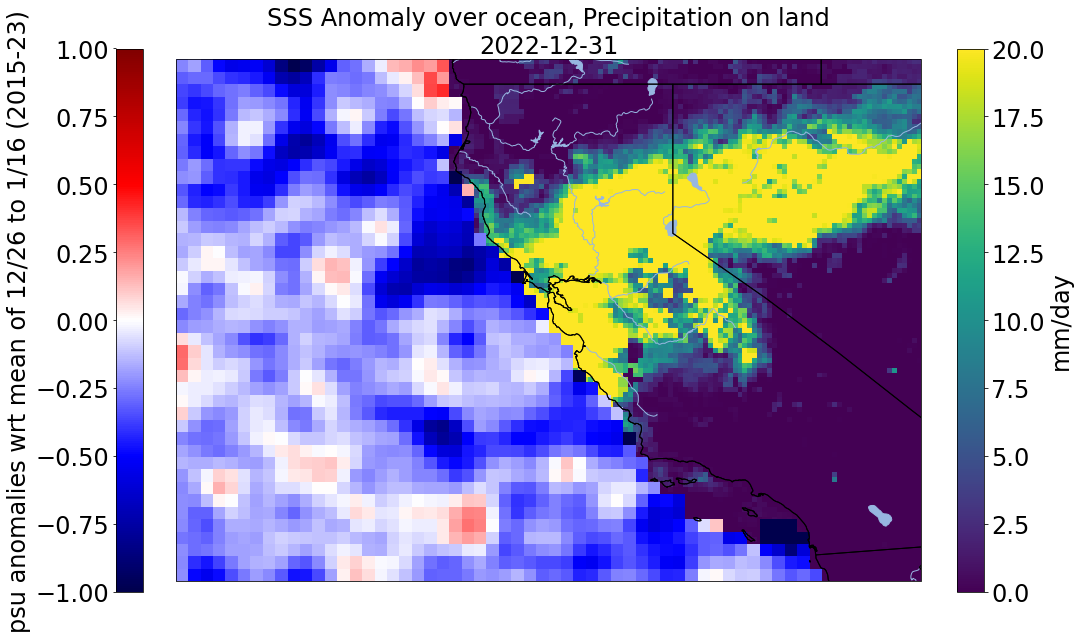

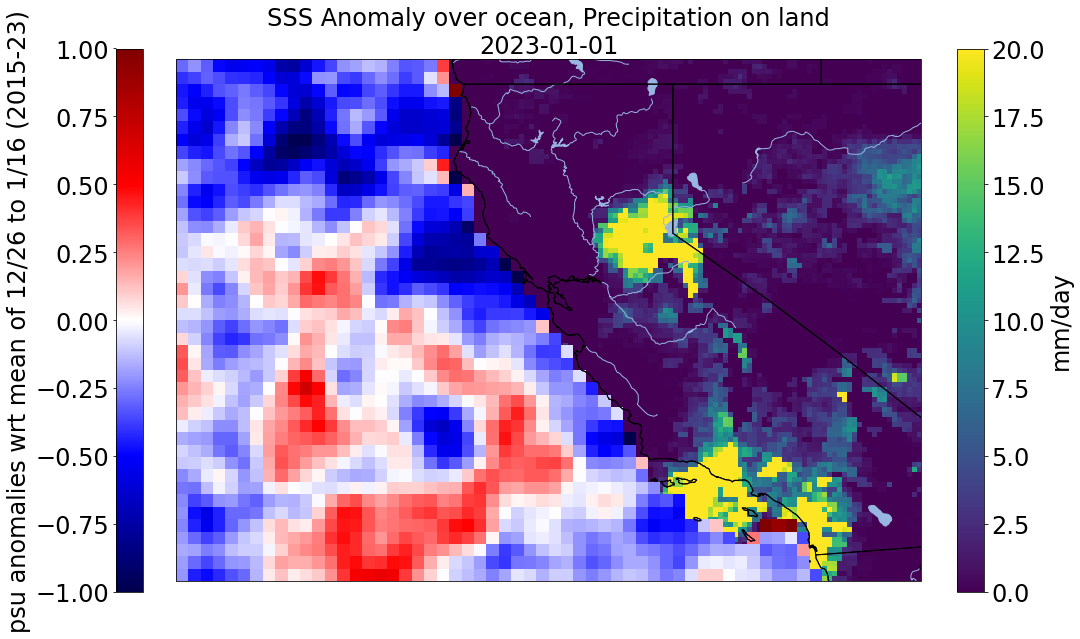

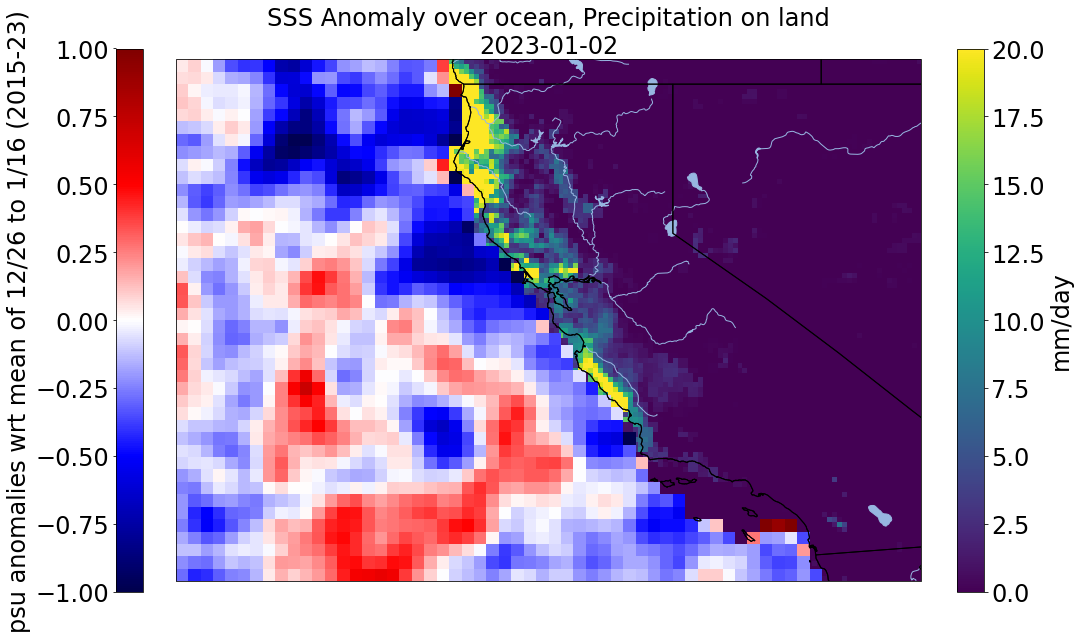

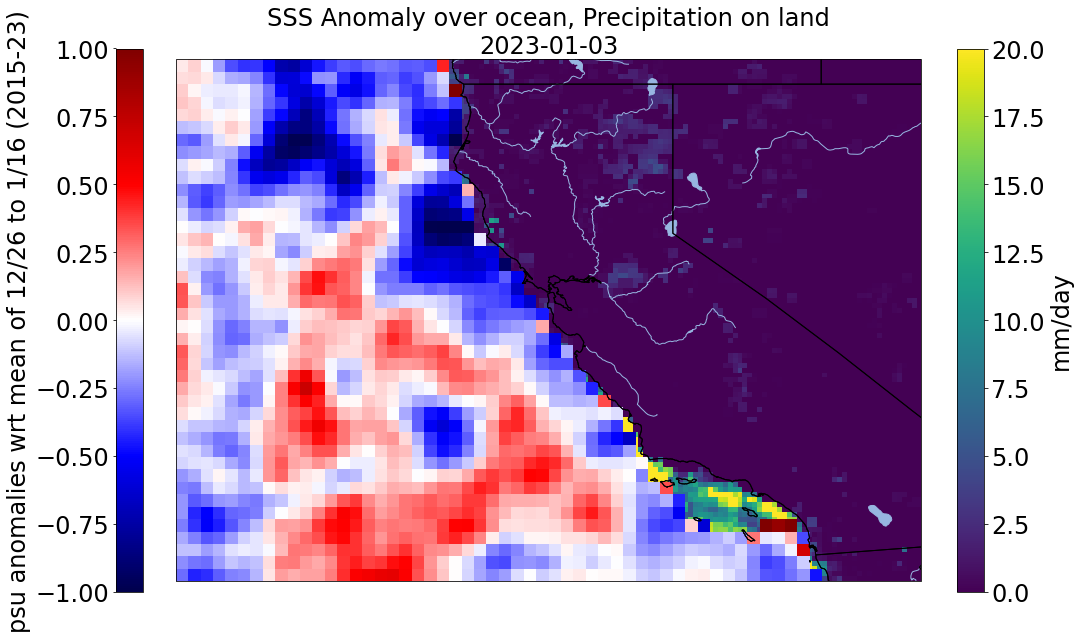

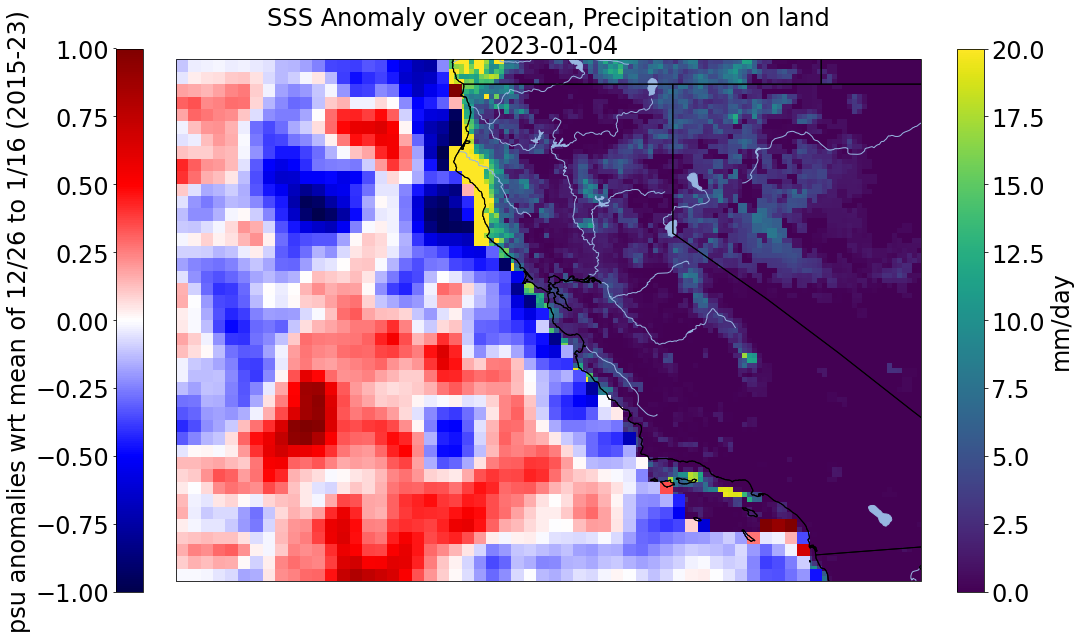

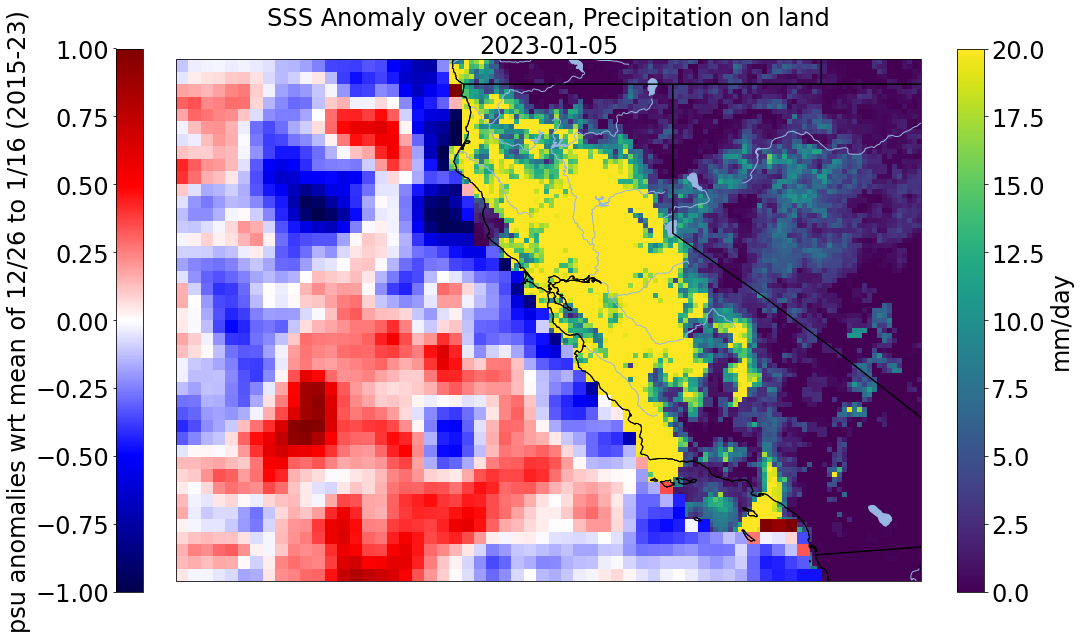

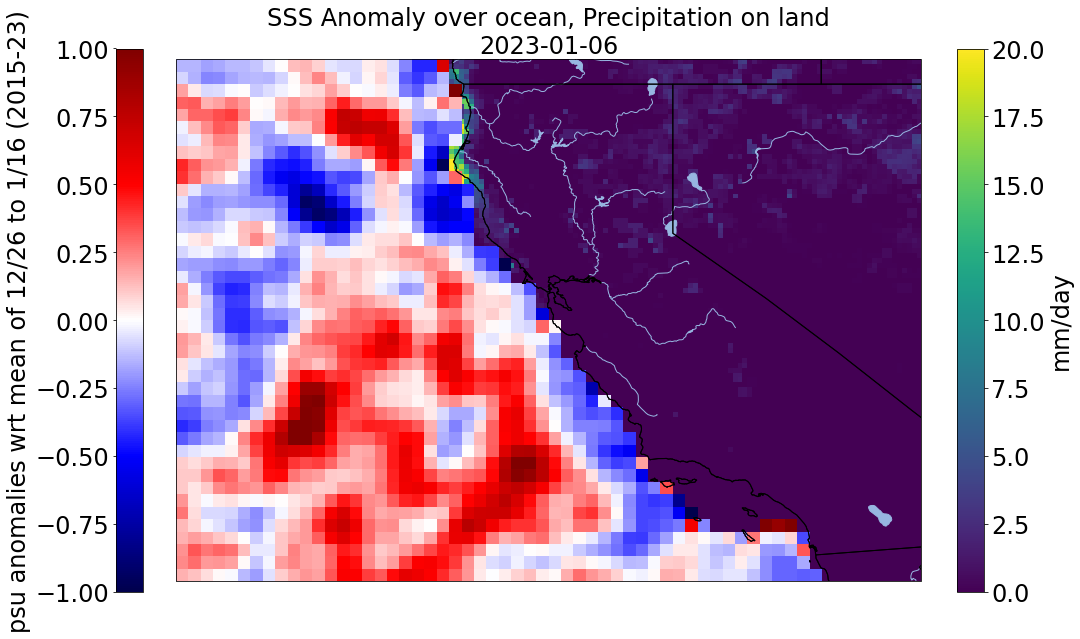

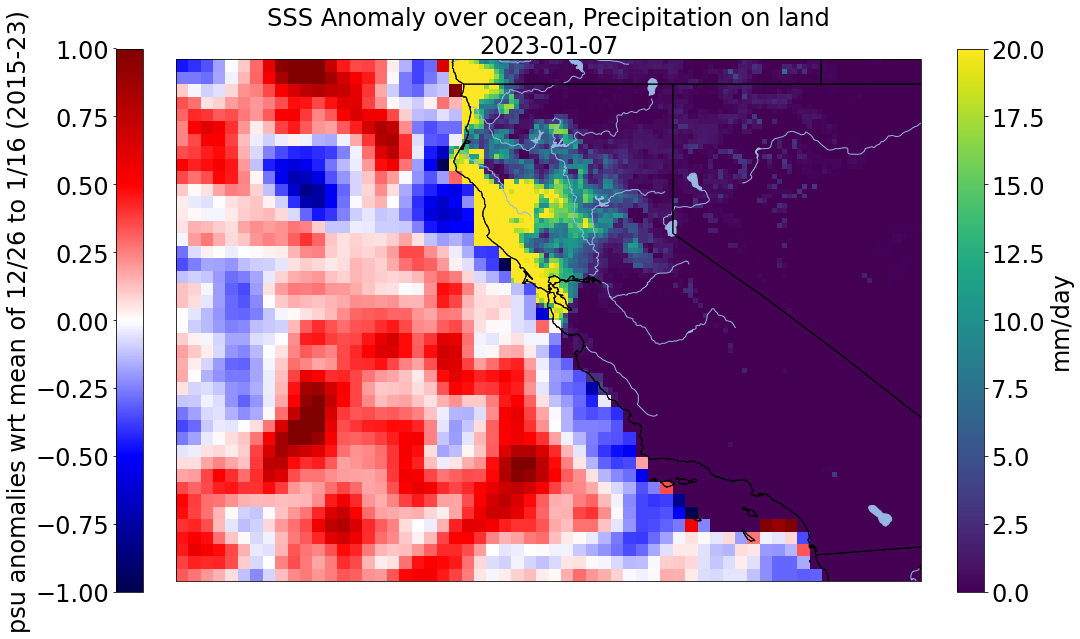

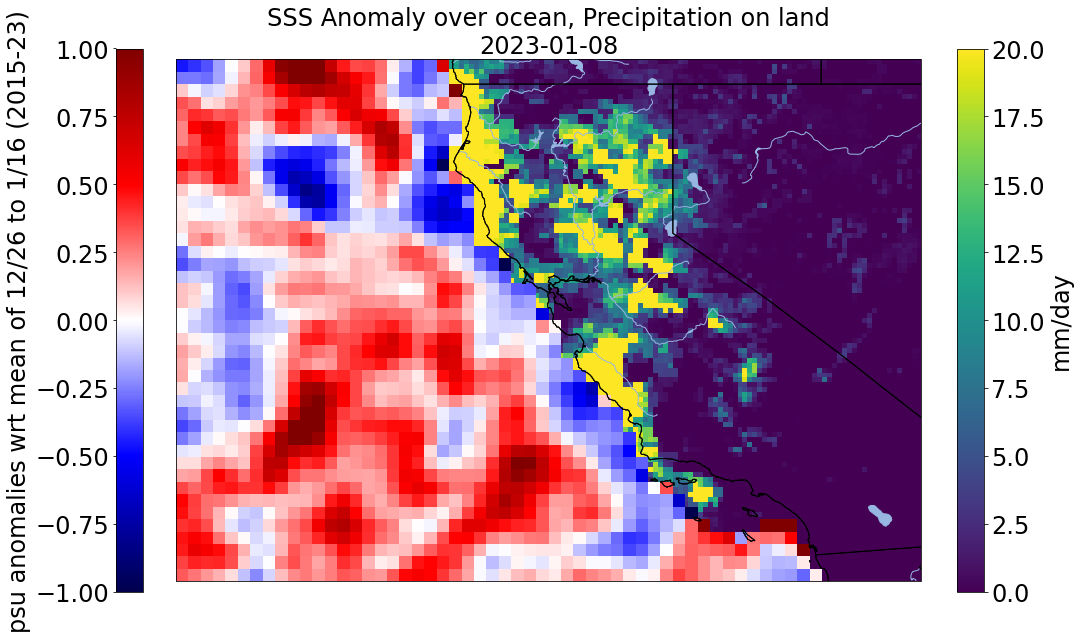

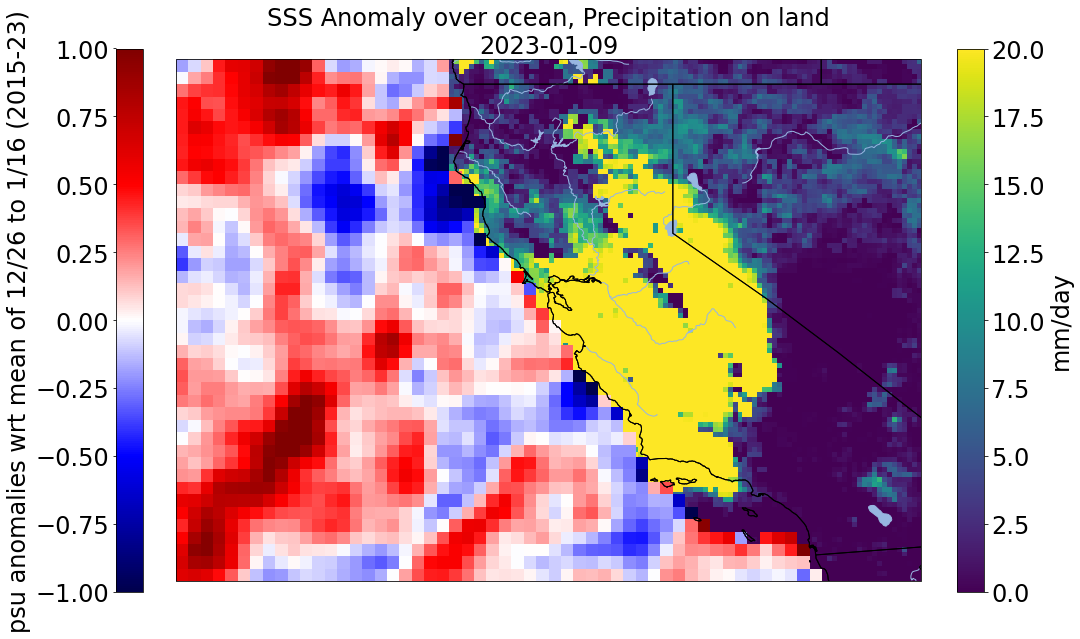

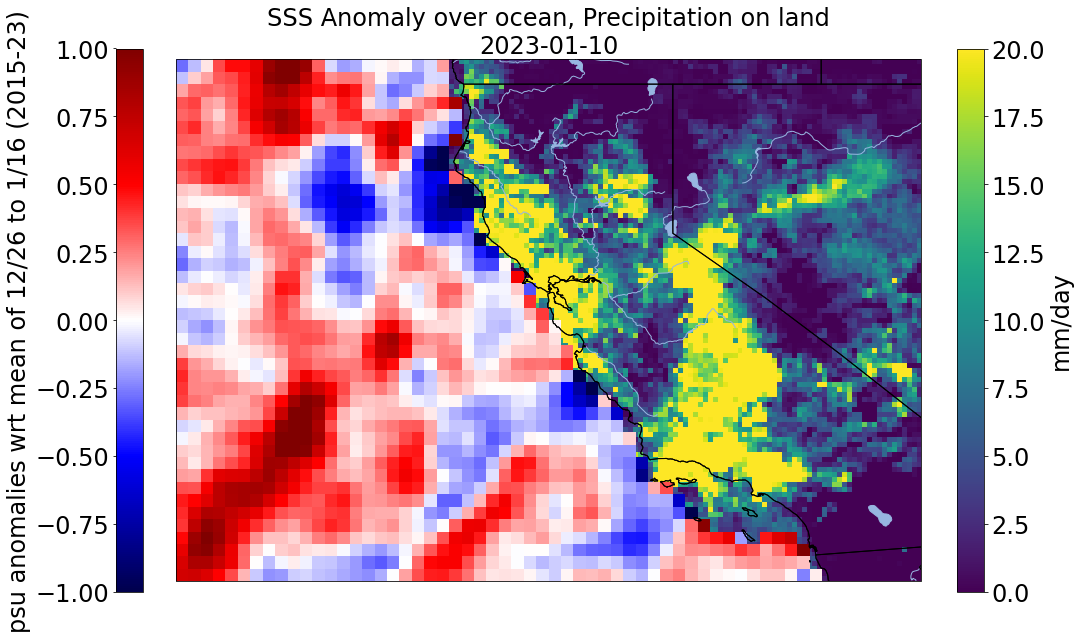

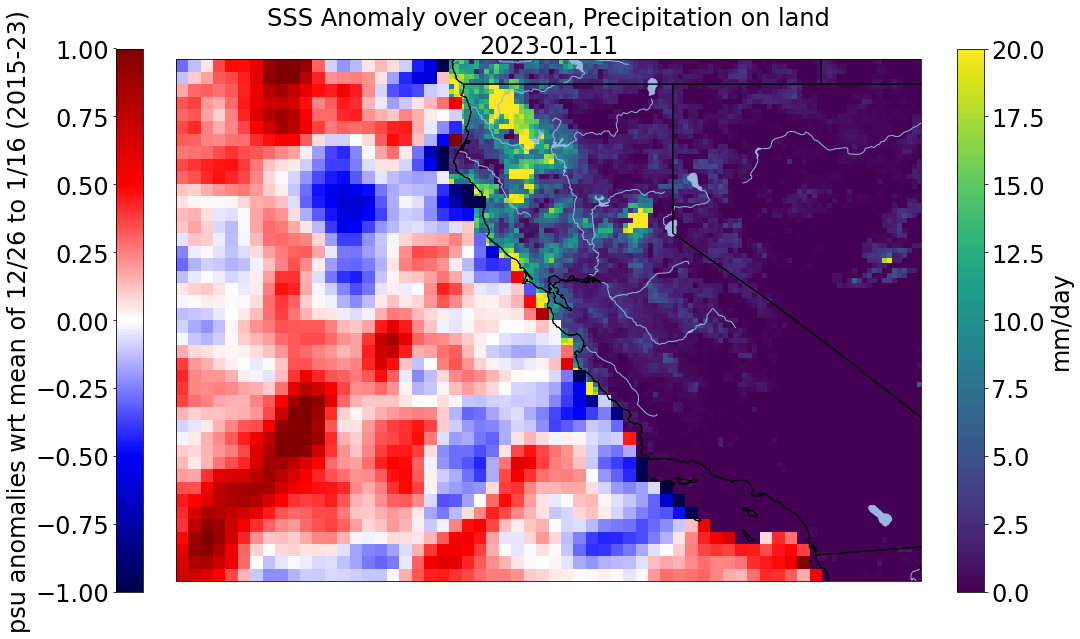

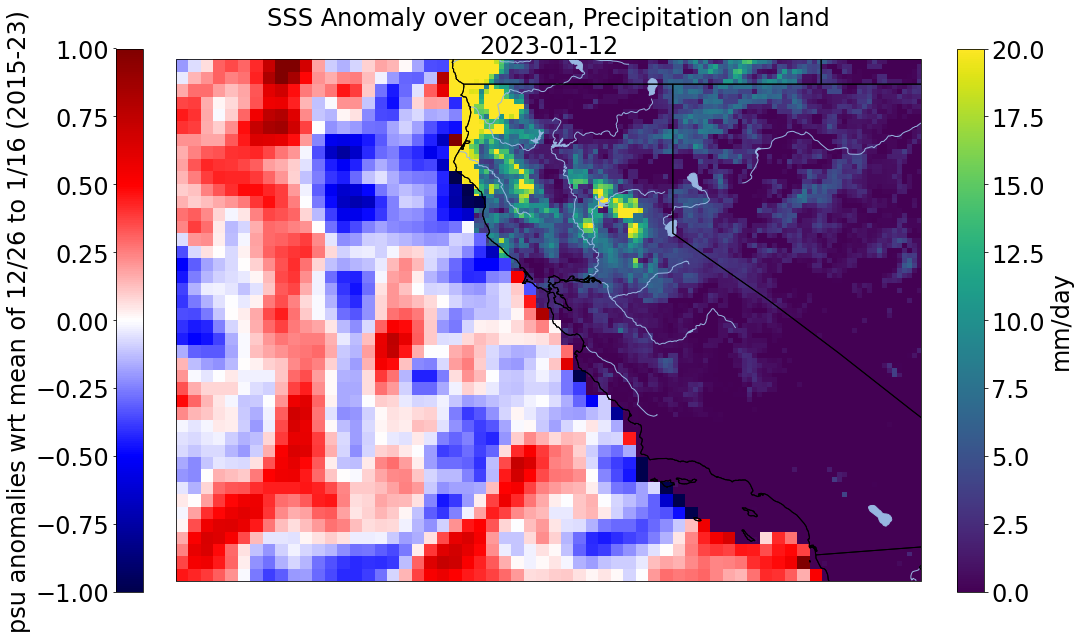

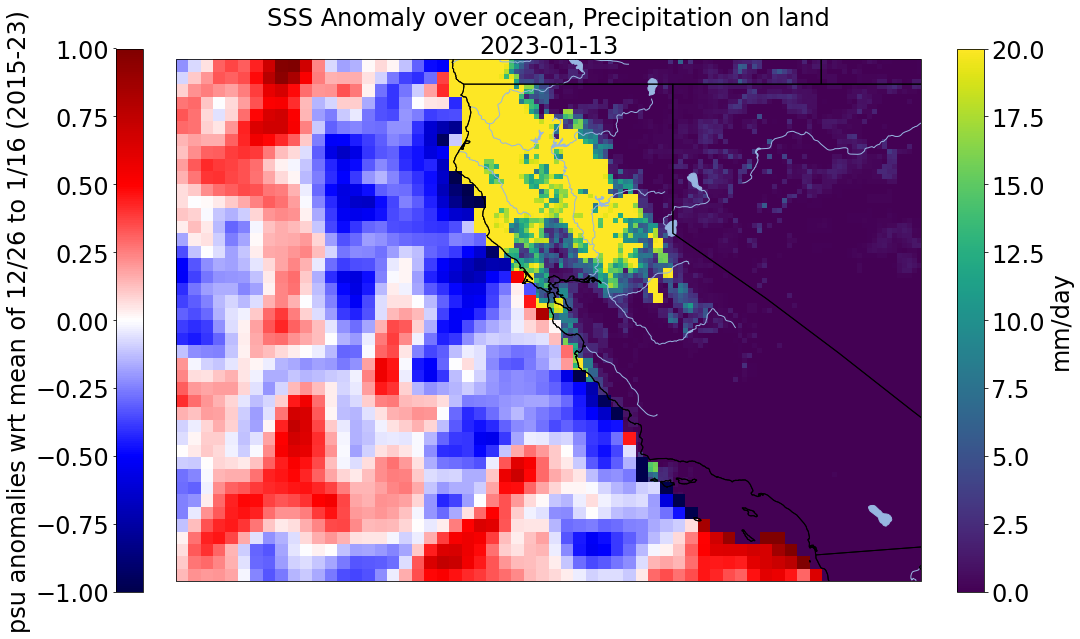

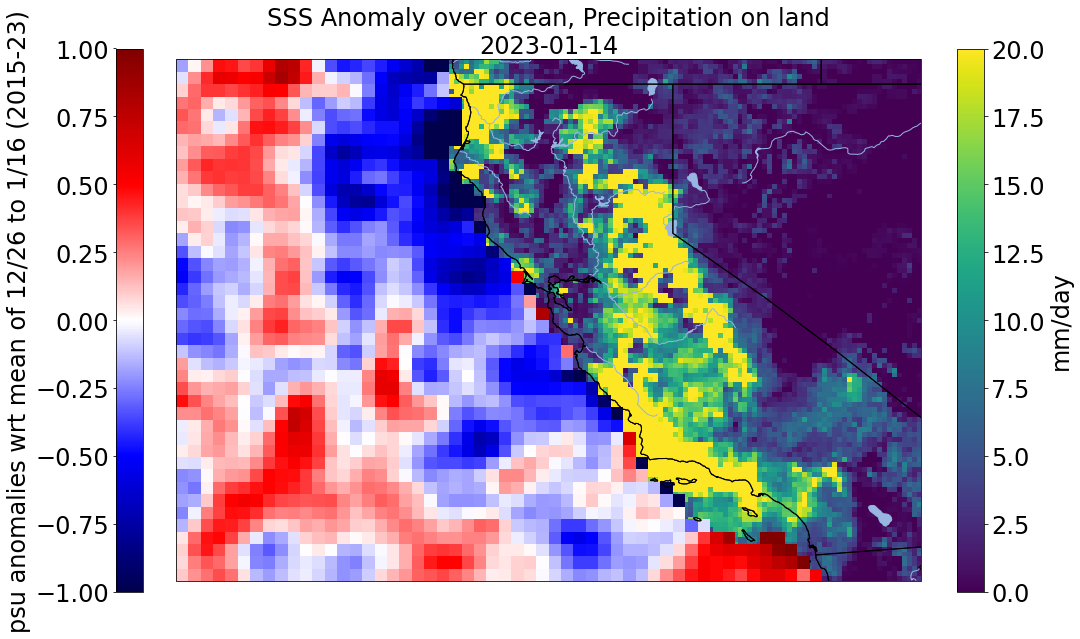

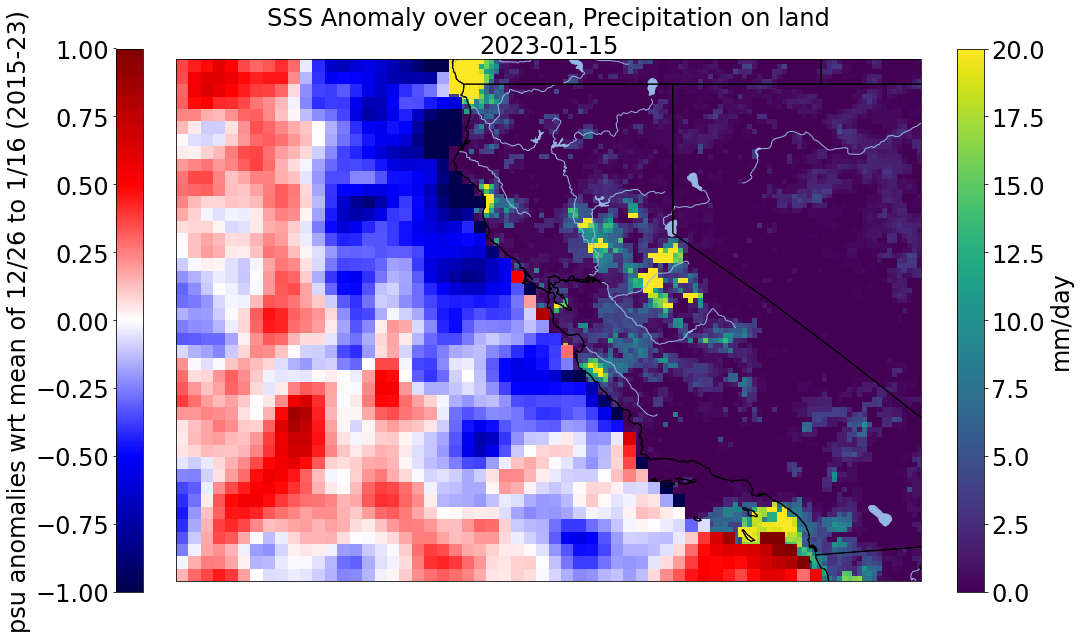

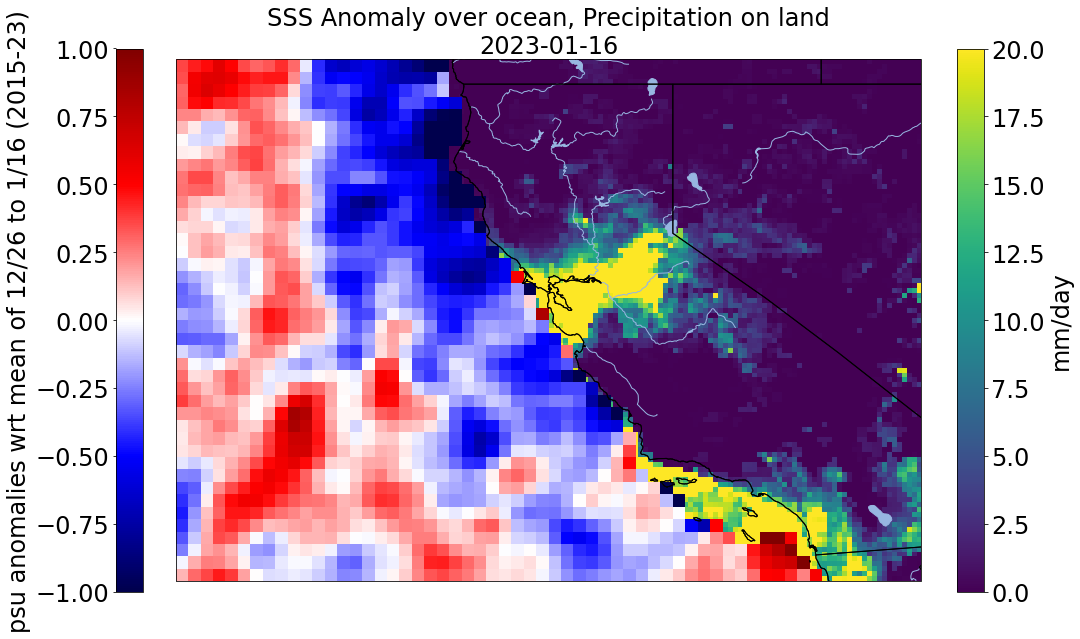

In [6]:
#Plots precip data only over land, using a colorscale
mode_choice = 2 

#currently, the line below is commented but you can uncomment this line and it will display raw SSS values (doesnt calculate anomalies) 
#calc_anomaly = 0 

#calculate anomalies relative to the mean
calc_anomaly = 1 

#Replace with your dictory for IMERG precip data
directory = os.path.join(base_directory, 'Desktop/imerg_precip')
if 'backup_subset_mean_values' not in globals():
    backup_subset_mean_values = subset_mean_values

#raw sss values
if calc_anomaly == 0:
    subset_mean_values = 0
    smin = 31
    smax = 34.5  
    smap = 'rainbow'

#anomaly values
if calc_anomaly != 0:
    subset_mean_values = backup_subset_mean_values 
    smin = -1
    smax = +1 
    smap = 'seismic'

#Replace with your directory 
sss_subset = sorted(glob.glob(os.path.join(base_directory, 'Desktop/jpl_smap_l3/SMAP*.nc*')))

#grabs the sss file date for the subset location and plots anomalies
for filename in sss_subset:
    file_date = filename.split('_')[-3].replace('.nc', '')
    updated_file_date = file_date[0:4]+'-'+file_date[4:6]+'-'+file_date[6:8]
    if int(file_date) < int(subset_bounds[0]) or int(file_date) > int(subset_bounds[1]):
        continue
    print(file_date)
    sss_ds = xr.open_dataset(filename)
    try:
        sss_ds = sss_ds.where((sss_ds.latitude>20)&(sss_ds.latitude<50)&(sss_ds.longitude>-140)&(sss_ds.longitude<-100), drop=True)- subset_mean_values
        if sss_ds.smap_sss.size == 0:
            continue
    except Exception as e:
        print(e)
        continue
    plt.rcParams.update({"font.size": 24})
    fig = plt.figure(figsize= (16,10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    #grabs the precip file date for the subset location and plots  
    substring = file_date
    precip_counter = 0
    for file_path in glob.glob(os.path.join(directory, f'*{substring}*')):
        precip_counter += 1
        if precip_counter >1:
            crashnow
        print(file_path)
        precip = xr.open_dataset(file_path)
        precip = precip.where((precip.lat>20)&(precip.lat<50)&(precip.lon>-140)&(precip.lon<-100),drop=True)
        val = 24*precip.HQprecipitation[0,:,:]/(0.5*precip.HQprecipitation_cnt[0,:,:])
        if mode_choice == 2: 
            p = plt.pcolormesh(precip.lon,precip.lat,val.transpose(), cmap = 'viridis', vmax = 20, vmin = 0, transform = ccrs.PlateCarree())
        cb = plt.colorbar(p, fraction=0.046, pad=0.04)
        cb.set_label('mm/day')

    #the line below plots the raw sss values if its uncommented
    s = plt.pcolormesh(sss_ds.longitude, sss_ds.latitude, sss_ds.smap_sss, vmin = smin, vmax = smax, cmap = smap, transform = ccrs.PlateCarree())
    
    #adds the colorbar and features to the plot
    cb = plt.colorbar(s, location = 'left', fraction=0.046, pad=0.04)
    if calc_anomaly == 1:
        cb.set_label(f'psu anomalies wrt mean of 12/26 to 1/16 (2015-23)')
        ax.set_title(f'SSS Anomaly over ocean, Precipitation on land\n{updated_file_date}', size = 24)
    if calc_anomaly != 1:
        cb.set_label('psu')
        ax.set_title(f'SSS over ocean, Precipitation on land\n{updated_file_date}', size = 24)
    ax.grid()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.STATES)
    ax.coastlines()
    ax.set_xlim(-130, -115)
    ax.set_ylim(32, 42.5)

    #saves figure to output path 
    plt.savefig(outputpath+datetime.now().strftime("%Y%m%d-%H%M%S")+'.png',dpi=400, facecolor='w', transparent=False, bbox_inches='tight')